You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

Step 1: Importing all the datasets

In [ ]:
import pandas as pd
import numpy as np
calls=pd.read_csv('/datasets/megaline_calls.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')
users=pd.read_csv('/datasets/megaline_users.csv')

Step 2: Preparing the data

In [ ]:
#calls dataset
print(calls.info())
print(calls.isnull().sum())
calls['call_date']=pd.to_datetime(calls['call_date'],format='%Y-%m-%d')
calls['duration']=calls['duration'].apply(np.ceil)
calls_new=calls.query('duration>0')
print(calls_new.info())
print(calls['duration'].describe())
print(calls_new['duration'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
id           0
user_id      0
call_date    0
duration     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
id           110901 non-null object
user_id      110901 non-null int64
call_date    110901 non-null datetime64[ns]
duration     110901 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None
count    137735.000000
mean          7.146673
std           5.953919
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64
count    110901.000000
mean          8.8759

Calls dataset has 4 columns with no duplicates and blanks. However there are 26834 values with 0 call duration. Removing these values has shifted the average call duartion from 6.7 min to 8.3 min. 


<div class="alert alert-success" role="alert">
Good work with calls data.
</div>

<div class="alert alert-danger" role="alert">
You just need to add one thing. 
    
From the task: Megaline always rounds up the minute and megabyte values. If the call lasted just one second, it will be counted as one minute. 
    
So you need to round up each call. np.ceil() can help you here.
</div>

In [ ]:
#internet dataset
print(internet.info())
print(internet.duplicated().sum())
print(internet.isnull().sum())
internet['session_date']=pd.to_datetime(internet['session_date'],format='%Y-%m-%d')
internet['mb_used']=internet['mb_used'].apply(np.ceil)
internet_new=internet.query('mb_used>0')
print(internet.describe())
print(internet_new.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
0
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     367.142876
std       142.053913     277.256974
min      1000.000000       0.000000
25%      1122.000000     137.000000
50%      1236.000000     344.000000
75%      1367.000000     555.000000
max      1499.000000    1694.000000
            user_id       mb_used
count  91078.000000  91078.000000
mean    1242.576923    422.558159
std      141.992374    255.064363
min     1000.000000      1.000000
25%     1122.000000    224.000000
50%     1236.000000    396.000000
75%     1367.00000

<div class="alert alert-danger" role="alert">
Same for internet traffic. Please update each session up to whole megabyte.
</div>

In [ ]:
#messages dataset
print(messages.info())
print(messages.duplicated().sum())
print(messages.isnull().sum())
messages['message_date']=pd.to_datetime(messages['message_date'],format='%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
0
id              0
user_id         0
message_date    0
dtype: int64


<div class="alert alert-success" role="alert">
Messages are OK.
</div>

In [ ]:
#plans dataset
print(plans.info())
print(plans.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [ ]:
#users dataset
print(users.info())
print(users.head(10))
print(users.isnull().sum())
users['reg_date']=pd.to_datetime(users['reg_date'],format='%Y-%m-%d')
users['churn_date']=users['churn_date'].fillna(0)
users['churn_date']=pd.to_datetime(users['churn_date'],format='%Y-%m-%d')
print(users.head(10))
print(users.info())
print(users.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6   

In [ ]:
#The number of calls made and minutes used per month
calls['month']=pd.DatetimeIndex(calls['call_date']).month
data_1=pd.merge(users, calls, on='user_id',how='left')
data_1.reset_index(inplace=True)
calls_peruser=data_1.pivot_table(index=['user_id','month','tariff'],values='duration',aggfunc=['count','sum'])
calls_peruser.columns=['no_of_calls','minutes_used']
calls_peruser.reset_index(inplace=True)
print(calls_peruser)

      user_id  month    tariff  no_of_calls  minutes_used
0        1000   12.0  ultimate           16         124.0
1        1001    8.0      surf           27         182.0
2        1001    9.0      surf           49         315.0
3        1001   10.0      surf           65         393.0
4        1001   11.0      surf           64         426.0
...       ...    ...       ...          ...           ...
2253     1498   12.0      surf           39         339.0
2254     1499    9.0      surf           41         346.0
2255     1499   10.0      surf           53         385.0
2256     1499   11.0      surf           45         308.0
2257     1499   12.0      surf           65         496.0

[2258 rows x 5 columns]


In [ ]:
#The number of text messages sent per month
messages['month']=pd.DatetimeIndex(messages['message_date']).month.astype('int')
data_2=pd.merge(users,messages, on='user_id', how='left')
data_2.reset_index(inplace=True)
messages_peruser=data_2.pivot_table(index=['user_id','month','tariff'], values='id', aggfunc='count')
messages_peruser.columns=['no_messages']
messages_peruser.reset_index(inplace=True)
print(messages_peruser)

      user_id  month    tariff  no_messages
0        1000   12.0  ultimate           11
1        1001    8.0      surf           30
2        1001    9.0      surf           44
3        1001   10.0      surf           53
4        1001   11.0      surf           36
...       ...    ...       ...          ...
1801     1496    9.0      surf           21
1802     1496   10.0      surf           18
1803     1496   11.0      surf           13
1804     1496   12.0      surf           11
1805     1497   12.0  ultimate           50

[1806 rows x 4 columns]


In [ ]:
#The volume of data per month
internet['month']=pd.DatetimeIndex(internet['session_date']).month.astype('int')
data_3=pd.merge(users,internet, on='user_id', how='left')
data_3.reset_index(inplace=True)
data_peruser=data_3.pivot_table(index=['user_id', 'month','tariff'], values='mb_used', aggfunc='sum')
data_peruser.columns=['data_used']
data_peruser.reset_index(inplace=True)
print(data_peruser)

      user_id  month    tariff  data_used
0        1000   12.0  ultimate     1903.0
1        1001    8.0      surf     6929.0
2        1001    9.0      surf    13333.0
3        1001   10.0      surf    22356.0
4        1001   11.0      surf    18524.0
...       ...    ...       ...        ...
2272     1498   12.0      surf    23160.0
2273     1499    9.0      surf    13004.0
2274     1499   10.0      surf    19515.0
2275     1499   11.0      surf    16834.0
2276     1499   12.0      surf    22091.0

[2277 rows x 4 columns]


In [ ]:
#monthly profit data preparation
import numpy as np
new_data1=calls_peruser.merge(messages_peruser, on=['user_id','month','tariff'], how='outer')
final=new_data1.merge(data_peruser, on=['user_id','month','tariff'], how='outer')
print(final.head(10))
final['no_of_calls']=final['no_of_calls'].fillna(0)
final['minutes_used']=final['minutes_used'].fillna(0)
final['no_messages']=final['no_messages'].fillna(0)
final['data_used']=final['data_used'].fillna(0)
print(final.isnull().sum())
final['no_of_calls']=final['no_of_calls'].apply(np.ceil).astype('int')
final['minutes_used']=final['minutes_used'].apply(np.ceil).astype('int')
final['no_messages']=final['no_messages'].apply(np.ceil).astype('int')
final['data_used']=(final['data_used']/1000).apply(np.ceil).astype('int')
print(final.info())

   user_id  month    tariff  no_of_calls  minutes_used  no_messages  data_used
0     1000   12.0  ultimate         16.0         124.0         11.0     1903.0
1     1001    8.0      surf         27.0         182.0         30.0     6929.0
2     1001    9.0      surf         49.0         315.0         44.0    13333.0
3     1001   10.0      surf         65.0         393.0         53.0    22356.0
4     1001   11.0      surf         64.0         426.0         36.0    18524.0
5     1001   12.0      surf         56.0         412.0         44.0    19398.0
6     1002   10.0      surf         11.0          59.0         15.0     6559.0
7     1002   11.0      surf         55.0         386.0         32.0    19364.0
8     1002   12.0      surf         47.0         384.0         41.0    14416.0
9     1003   12.0      surf        149.0        1104.0         50.0    27069.0
user_id         0
month           0
tariff          0
no_of_calls     0
minutes_used    0
no_messages     0
data_used       0
dtype

In [ ]:
#monthly profit per user per month calculated
import warnings
warnings.filterwarnings('ignore')
final_ultimate=final.query('tariff=="ultimate"')
final_ultimate['extra']=(final_ultimate['minutes_used']-3000)*0.01+(final_ultimate['no_messages']-1000)*0.01+(final_ultimate['data_used']-30)*7
final_ultimate.loc[final_ultimate['extra']<0,'extra']=0
final_ultimate['profit_ultimate']=final_ultimate['extra']+70
print(final_ultimate)

final_surf=final.query('tariff=="surf"')
final_surf.reset_index()
final_surf['extra']=(final_surf['minutes_used']-500)*0.03+(final_surf['no_messages']-50)*0.03+(final_surf['data_used']-15)*10
final_surf.loc[final_surf['extra']<0,'extra']=0
final_surf['profit_surf']=final_surf['extra']+20

print(final_surf)    

      user_id  month    tariff  no_of_calls  minutes_used  no_messages  \
0        1000   12.0  ultimate           16           124           11   
19       1006   11.0  ultimate            2            10           15   
20       1006   12.0  ultimate            9            59          139   
26       1008   10.0  ultimate           71           476           21   
27       1008   11.0  ultimate           63           446           37   
...       ...    ...       ...          ...           ...          ...   
2284     1204   12.0  ultimate            0             0           78   
2285     1224    6.0  ultimate            0             0            5   
2290     1482   10.0  ultimate            0             0            2   
2291     1108   12.0  ultimate            0             0            0   
2292     1311    6.0  ultimate            0             0            0   

      data_used  extra  profit_ultimate  
0             2   0.00            70.00  
19            3   0.00     

<div class="alert alert-warning" role="alert">
Profit calculations are correct but you've used hardcoded numbers. It is not a good practice. You have a tariff dataset so you can use appropriate values from there. And if something changed in tariff your code will work correctly without fixing.</div>

Also you can use this code to disable warnings

``import warnings
warnings.filterwarnings('ignore')``

---

Conclusion for Preparing the data:
The datatype for date column was not correct in all 4 datasets. The format changed from object to datetime. There are 0 values in both calls data and internet data. However removing 0 values shift the average and may give artificially higher usage in terms of calls and internet. Hence I have kept the 0 value rows for further data analysis. The total no of users in surf are much higher than ultimate, hecne the total sales from surf plan customers is much higher then ultimate customers.

Step 3: Analyzing the data

<div class="alert alert-warning" role="alert">
In markdown cells, you can use markdown language to nicely format  your projects. It is a powerful formatting language. So if you spend some time learning it you can then prepare better looking projects.</div>

Here is a link to short tutorial: https://www.markdowntutorial.com/

In [ ]:
#minutes, texts, and volume of data the users of each plan require per month
print(final_ultimate.groupby('month')['minutes_used','no_messages','data_used'].sum())
print(final_surf.groupby('month')['minutes_used','no_messages','data_used'].sum())
print(final_ultimate.describe())
print(final_surf.describe())

       minutes_used  no_messages  data_used
month                                      
1.0             774           62         29
2.0            2822          151        123
3.0            3651          243        226
4.0            7074          463        346
5.0           11781          931        495
6.0           17435         1379        744
7.0           25197         1937        994
8.0           29922         2732       1305
9.0           37626         3259       1511
10.0          47778         4181       1919
11.0          56540         4903       2230
12.0          69324         6796       2847
       minutes_used  no_messages  data_used
month                                      
1.0             406           21         10
2.0            2673          108        114
3.0            7590          351        318
4.0           17577          870        622
5.0           30768         1849       1113
6.0           41836         2454       1530
7.0           54448         3271

The comparison of the two plans shows that ultimate plan users are on an average spending 80USD which is only 10 dollars increased from the plan price, while most of the surf customers are spending more than double of the plan price on an average.

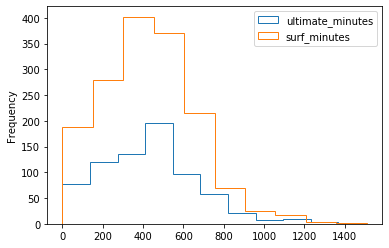

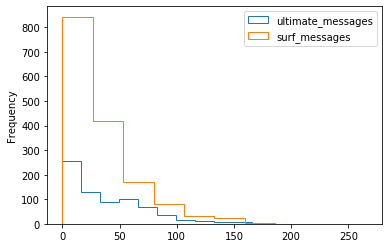

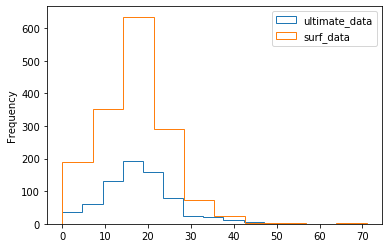

In [ ]:
#histograms to see the distribution

a=final_ultimate.plot(kind='hist', y='minutes_used', legend=True, histtype='step', label='ultimate_minutes')
final_surf.plot(kind='hist',y='minutes_used', legend=True, histtype='step', ax=a, label='surf_minutes')

b=final_ultimate.plot(kind='hist', y='no_messages', legend=True, histtype='step', label='ultimate_messages')
final_surf.plot(kind='hist',y='no_messages', legend=True, histtype='step', ax=b, label='surf_messages')

c=final_ultimate.plot(kind='hist', y='data_used', legend=True, histtype='step', label='ultimate_data')
final_surf.plot(kind='hist',y='data_used', legend=True, histtype='step', ax=c, label='surf_data')


-Distribution for all the 3 parameters, minutes used, data used and messages used shows that even if ultimate plan has much higher call minutes, data and messages incldued in the plan compared to surf plan, still the usage distribution for both the plans remains similar.

<div class="alert alert-success" role="alert">
Everything is correct here
</div>

4.Hypothesis testing

In [ ]:
#H0:The average profit from users of Ultimate and Surf calling plans are same
#H1:The average profit from users of Ultimate and Surf calling plans differs

from scipy import stats as st
plan_ultimate=final_ultimate['profit_ultimate']
plan_surf=final_surf['profit_surf']
alpha=0.05
results=st.ttest_ind(plan_ultimate,plan_surf)
print('p-value:',results.pvalue)

if (results.pvalue<alpha):
    print('we reject the null hypothesis')   
else:
    print('we cannot reject the null hypothesis')

p-value: 5.336950259955032e-06
we reject the null hypothesis


Null hypothesis usually assumes there is no difference and hence I considered H0 that there is no difference in the average profits from two plans.
T-test shows that if we assume null hypothesis is correct, then the probability of the difference which is there in the mean of the two data sets is less then 5%, hence we reject the null hypothesis. This shows that the average profits between two plans are not same.

In [ ]:
#lemmatization to classify address into two categories NY-NJ and Others

import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemma = WordNetLemmatizer()

def lemmatise_text(row):
    return [wordnet_lemma.lemmatize(row, pos='n') for row in nltk.word_tokenize(row)]
users['lemma_city']=users['city'].apply(lemmatise_text)
print(users)

def city_name(row):
    if 'York-Newark-Jersey' in row:
        return 'NY-NJ'
    else:
        return 'Others'
    
users['new_city']=users['lemma_city'].apply(city_name)
print(users['new_city'].unique())


     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city   reg_date    tariff  \
0        Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA 2018-10-21      surf   
3                                Tulsa, OK MSA 2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA 2018-05-23      surf   
..                                         ..

Combining profits into the users table along with new_city name

In [ ]:
final_ultimate1=final_ultimate.pivot_table(index='user_id', values='profit_ultimate', aggfunc='sum')
final_ultimate1.reset_index(inplace=True)
final_ultimate1.columns=['user_id','profit']
#print(final_ultimate1)
final_surf1=final_surf.pivot_table(index='user_id', values='profit_surf', aggfunc='sum')
final_surf1.reset_index(inplace=True)
final_surf1.columns=['user_id','profit']
#print(final_surf1)
new=pd.concat([final_ultimate1,final_surf1], ignore_index=True)
#print(new)
users_with_profit=users.merge(new, on='user_id', how='left')
print(users_with_profit)

     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city   reg_date    tariff  \
0        Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA 2018-10-21      surf   
3                                Tulsa, OK MSA 2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA 2018-05-23      surf   
..                                         ..

In [ ]:
#creating seperate datasets for hypothesis testing

ny_data=users_with_profit.query('new_city=="NY-NJ"').pivot_table(index='user_id', values='profit', aggfunc='sum')
ny_data.reset_index(inplace=True)
#print(ny_data)

other_data=users_with_profit.query('new_city=="Others"').pivot_table(index='user_id', values='profit', aggfunc='sum')
other_data.reset_index(inplace=True)
#print(other_data)

ny_data_test=ny_data['profit']
other_data_test=other_data['profit']
print(ny_data_test)
print(other_data_test)


0      40.00
1     480.84
2      20.00
3     204.13
4     420.00
       ...  
75    191.39
76    210.00
77    207.93
78    476.95
79    814.19
Name: profit, Length: 80, dtype: float64
0       70.00
1      261.42
2      106.04
3      168.12
4      611.80
        ...  
415     96.94
416    350.00
417    129.20
418     70.00
419    216.17
Name: profit, Length: 420, dtype: float64


The average profit from users in NY-NJ area is different from that of the users from other regions.

In [ ]:
#H0:The average profit from users in NY-NJ area is similar to users from other regions.
#H1:The average profit from users in NY-NJ area is different from that of the users from other regions.

alpha=0.05
results2=st.ttest_ind(ny_data_test, other_data_test)
print('p-value:',results2.pvalue)

if (results2.pvalue<alpha):
    print('we reject the null hypothesis')   
else:
    print('we cannot reject the null hypothesis')

p-value: 0.698372989567885
we cannot reject the null hypothesis


Null hypothesis usually assumes there is no difference and hence I considered H0 that there is no difference in the average profits from NY-NJ area and other areas.
T-test shows that if we assume null hypothesis is correct, then the probability of the difference which is there in the mean of the two data sets is 68.5% which is very high, hence we cannot reject the null hypothesis. This shows that the average profits between two plans are similar.

<div class="alert alert-success" role="alert">
Good work. All the questions were explained.</div>

Overall conclusion

1. Since surf is a cheaper plan, hence the number of users are high (almost double) compared to the no of users of ultimate plan.
2. In between two plans, there are significant differnces in no of minutes, data and messages included. Yet, the average usage among users remain similar. Because of which users of surf plan on an average spend 60USD which is much higher then the monthly charge. While the users of ultimate plan does not spend more than the monthly charge.




have different no of call minutes,  'ultimate' and 'surf' have significant differences in the 